Estimated Parameters (extension):
c3_e: -0.7448869503709905
c2_e: 0.21176643715150878
c1_e: -0.0011027005965932723
c0_e: 4.393294240599366
Estimated Parameters (contraction):
c3_c: -2.2741225186885043
c2_c: 0.29140959830696567
c1_c: -0.001255729968239295
c0_c: 2.7704977104782564
First 5 data points:
(191.46, 0.35, 0.0)
(192.8393103448276, 0.35, 3.6278747243332203)
(194.21862068965518, 0.35, 7.624062353878067)
(195.59793103448277, 0.35, 11.968791667682313)
(196.97724137931036, 0.35, 16.642291444793727)
Pressure range: 0.35 - 0.85
Length range: 174.86 - 231.46
Force range: 0.0 - 361.0481033591909
First 5 data points:
(175.0, 0.404, 0.0)
(175.40404040404042, 0.404, 0.9885604036331909)
(175.8080808080808, 0.404, 2.0150622028904412)
(176.21212121212122, 0.404, 3.0790084372391693)
(176.6161616161616, 0.404, 4.179902146146793)
Pressure range: 0.35 - 0.85
Length range: 174.86 - 231.46
Force range: 0.0 - 361.0481033591909


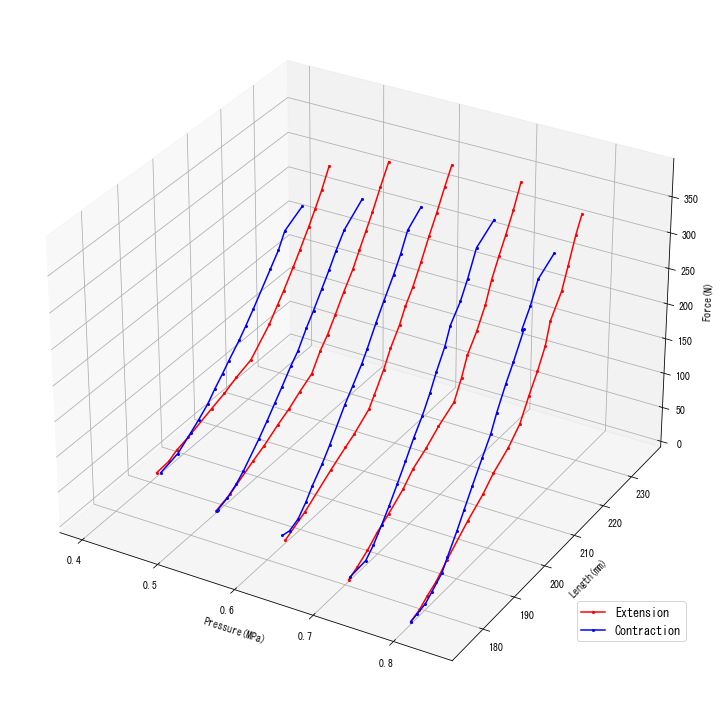

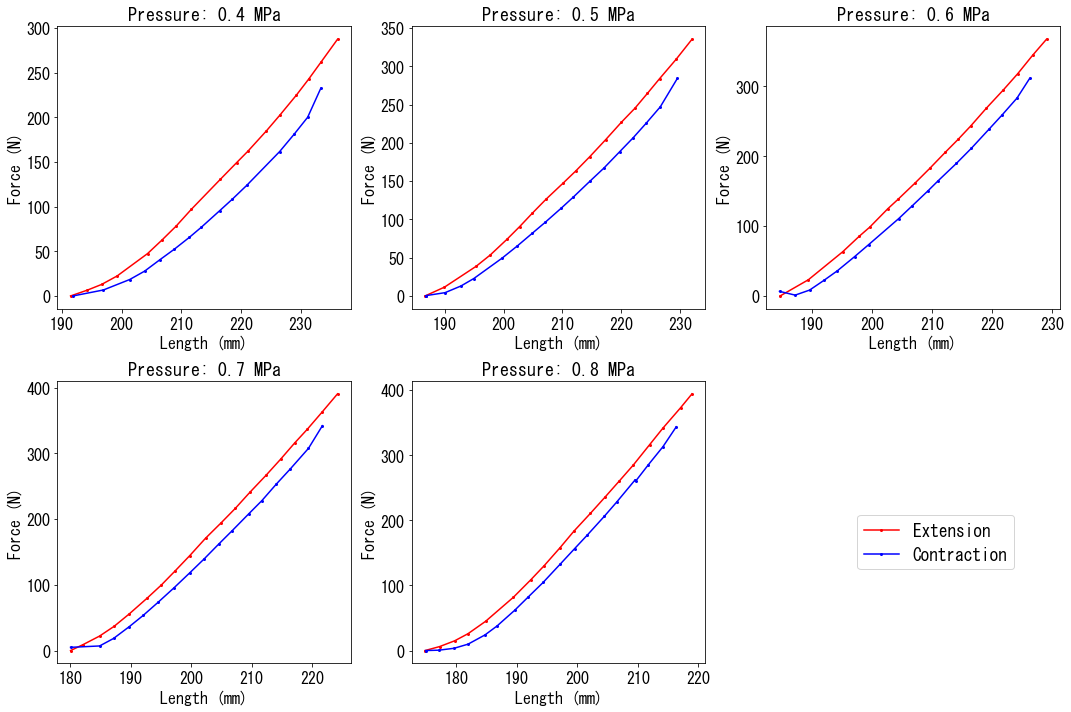

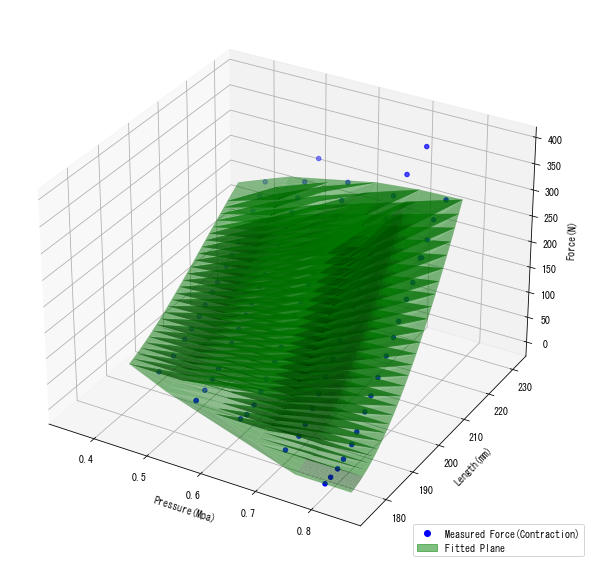

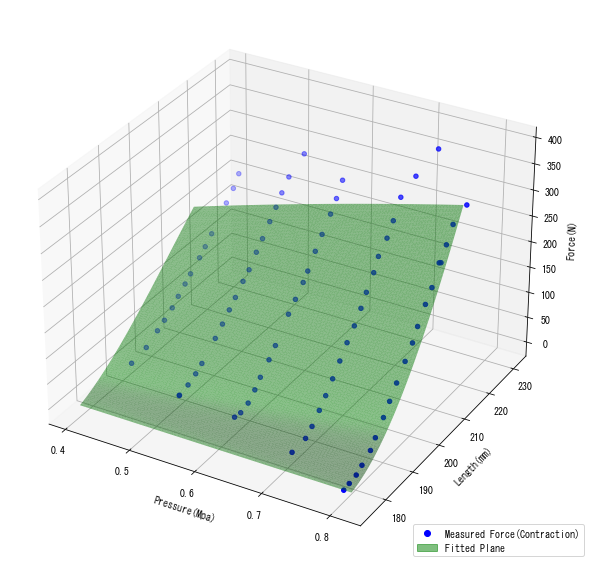

In [30]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter, MultipleLocator
from datetime import datetime
from matplotlib.ticker import FixedLocator
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import csv


plt.rcParams['font.family'] = 'MS Gothic' #凡例やラベルに日本語を使っても文字化けしないようにする
current_date = datetime.now().strftime("%Y%m%d")

pressure1 = 4
pressure2 = 5
pressure3 = 6
pressure4 = 7
pressure5 = 8

date = 20231124
count = 1
measurement_kind = 6

pressure_with_decimal1 = f"0.{pressure1}" 
pressure_with_decimal2 = f"0.{pressure2}" 
pressure_with_decimal3 = f"0.{pressure3}" 
pressure_with_decimal4 = f"0.{pressure4}" 
pressure_with_decimal5 = f"0.{pressure5}" 

dt1 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal1}_ese.csv")
dt2 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal2}_ese.csv")
dt3 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal3}_ese.csv")
dt4 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal4}_ese.csv")
dt5 = pd.read_csv(f"C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\estimated_static_extracted\\{date}_{count}_{measurement_kind}_{pressure_with_decimal5}_ese.csv")


column1 = dt1[["Pressure","Real Stretched Length","Force"]]
column2 = dt2[["Pressure","Real Stretched Length","Force"]]
column3 = dt3[["Pressure","Real Stretched Length","Force"]]
column4 = dt4[["Pressure","Real Stretched Length","Force"]]
column5 = dt5[["Pressure","Real Stretched Length","Force"]]

combined_column = pd.concat([column1,column2,column3,column4,column5])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d') #例えば．(221, projection='3d')(222, projection='3d')(223, projection='3d')(224, projection='3d')とすれば，4つグラフを並べられる 

dt_list = [column1, column2, column3, column4, column5]

for i, column in enumerate(dt_list):
    pressure_values = column["Pressure"].values
    length_values = column["Real Stretched Length"].values
    force_values = column["Force"].values

    # Forceが最大値を取るまでの範囲を赤でプロット
    idx_max_force = column["Force"].idxmax()
    ax.plot(pressure_values[:idx_max_force + 1], length_values[:idx_max_force + 1], force_values[:idx_max_force + 1], c='r', marker='o', markersize=2)

    # Forceが最大値を取った後の範囲を青でプロット
    ax.plot(pressure_values[idx_max_force + 1:], length_values[idx_max_force + 1:], force_values[idx_max_force + 1:], c='b', marker='o', markersize=2)
    
ax.set_xlabel('Pressure(MPa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

fig.legend(labels=['Extension', 'Contraction'], loc=(0.8,0.1), fontsize='large')

# 0.3から0.9まで0.1刻みの目盛りを設定
ax.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8])

# 0.3から0.9までの範囲にx軸のグリッドを表示
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

# メモリの位置を調整
ax.xaxis.set_major_locator(MultipleLocator(0.1))

# グリッドの表示
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()

#以下2D

# 各データフレームの圧力を凡例用に取得
pressure1 = column1["Pressure"].iloc[0]
pressure2 = column2["Pressure"].iloc[0]
pressure3 = column3["Pressure"].iloc[0]
pressure4 = column4["Pressure"].iloc[0]
pressure5 = column5["Pressure"].iloc[0]

# サブプロットの設定
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 各データをプロット
dt_list = [column1, column2, column3, column4, column5]
for i, ax in enumerate(axes.flat):
    if i < len(dt_list):
        column = dt_list[i]
        
        # 最初のPressureデータを取得して四捨五入
        first_pressure= round(column["Pressure"].iloc[0], 2)
        
        # Forceが最大値を取るまでの範囲を赤でプロット
        ax.plot(column["Real Stretched Length"][:column["Force"].idxmax() + 1], column["Force"][:column["Force"].idxmax() + 1], c='r', marker='o', markersize=2)

        # Forceが最大値を取った後の範囲を青でプロット
        ax.plot(column["Real Stretched Length"][column["Force"].idxmax() + 1:], column["Force"][column["Force"].idxmax() + 1:], c='b', marker='o', markersize=2)

        ax.set_xlabel('Length (mm)', fontsize=16)
        ax.set_ylabel('Force (N)', fontsize=16)
        ax.set_title(f'Pressure: {first_pressure} MPa'.format(int(column["Pressure"].iloc[0])), fontsize=18)
        
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        
    else:
        ax.axis('off')
        
# 凡例を追加
fig.legend(labels=['Extension', 'Contraction'], loc=(0.8,0.2), fontsize='xx-large')

plt.tight_layout()

# 最大値取得前のデータをまとめる
before_max_force_data = pd.concat([dt1.iloc[:idx_max_force + 1, :], dt2.iloc[:idx_max_force + 1, :], dt3.iloc[:idx_max_force + 1, :], dt4.iloc[:idx_max_force + 1, :], dt5.iloc[:idx_max_force + 1, :]])

# 最大値取得後のデータをまとめる
after_max_force_data = pd.concat([dt1.iloc[idx_max_force + 1:, :], dt2.iloc[idx_max_force + 1:, :], dt3.iloc[idx_max_force + 1:, :], dt4.iloc[idx_max_force + 1:, :], dt5.iloc[idx_max_force + 1:, :]])

pressure_values_c = after_max_force_data["Pressure"].values
force_values_c = after_max_force_data["Force"].values
length_values_c = after_max_force_data["Length"].values
length_values_cl = after_max_force_data["Real Stretched Length"].values

pressure_values_e = before_max_force_data["Pressure"].values
force_values_e = before_max_force_data["Force"].values
length_values_e = before_max_force_data["Length"].values
length_values_el = before_max_force_data["Real Stretched Length"].values


# 関数の定義
def calculate_F(data, c3, c2, c1, c0):
    P, L = data
    K = c3 * P**2 + c2 * P * L + c1 * L**2 + c0
    F = K * L
    return F

# パラメータの初期値
initial_guess = [1.0, 1.0, 1.0, 1.0]

# 最小二乗法によるフィッティング(ここで取得するパラメータの値はそのままにしておく）
params_e, covariance_e = curve_fit(calculate_F, (pressure_values_e,length_values_e), force_values_e, p0=initial_guess)
params_c, covariance_c = curve_fit(calculate_F, (pressure_values_c,length_values_c), force_values_c, p0=initial_guess)

# 推定されたパラメータ
c3_e, c2_e, c1_e, c0_e = params_e
c3_c, c2_c, c1_c, c0_c = params_c

print(f"Estimated Parameters (extension):")
print(f"c3_e: {c3_e}")
print(f"c2_e: {c2_e}")
print(f"c1_e: {c1_e}")
print(f"c0_e: {c0_e}")

print(f"Estimated Parameters (contraction):")
print(f"c3_c: {c3_c}")
print(f"c2_c: {c2_c}")
print(f"c1_c: {c1_c}")
print(f"c0_c: {c0_c}")


# 3D散布図
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# フィッティングした平面(ここ怪しい）
P_plane1, L_plane1 = np.meshgrid(np.linspace(0.35, 0.45, 30), np.linspace(0,40, 30))
P_plane2, L_plane2 = np.meshgrid(np.linspace(0.45,0.55, 30), np.linspace(0,40, 30))
P_plane3, L_plane3 = np.meshgrid(np.linspace(0.55, 0.65, 30), np.linspace(0,40, 30))
P_plane4, L_plane4 = np.meshgrid(np.linspace(0.65, 0.75, 30), np.linspace(0,40, 30))
P_plane5, L_plane5 = np.meshgrid(np.linspace(0.75,0.85, 30), np.linspace(0,40, 30))

F_plane1 = calculate_F((P_plane1, L_plane1), c3_c, c2_c, c1_c, c0_c)
F_plane2 = calculate_F((P_plane2, L_plane2), c3_c, c2_c, c1_c, c0_c)
F_plane3 = calculate_F((P_plane3, L_plane3), c3_c, c2_c, c1_c, c0_c)
F_plane4 = calculate_F((P_plane4, L_plane4), c3_c, c2_c, c1_c, c0_c)
F_plane5 = calculate_F((P_plane5, L_plane5), c3_c, c2_c, c1_c, c0_c)


# (Pressure, Length, Force) の3つの組を格納するリスト
data_points = []

# np.meshgrid を使用して生成された座標を組み合わせてリストに追加
def add_data_points(P_plane, L_plane, F_plane, data_points, offset):
    for j in range(len(P_plane)):
        for i in range(len(L_plane)):
            pressure = P_plane[i, j]  # i, jの順番に注意
            length = L_plane[i, j] + offset
            force = F_plane[i, j]
            data_points.append((length, pressure, force))

data_points = []

fit_params_path = 'C:\\Users\\Mizuki\\University\\Reserch\\length_sensor\\JupyterLab\\data\\length_pressure\\length_pressure.csv'
fit_params = pd.read_csv(fit_params_path, index_col=0)

# 簡単な入力に基づいて選択されたフィッティングパラメータの名前を取得
parameter_mapping = {'6': 'PAM-A', '4s': 'PAM-B', '4ss': 'PAM-C', 's': 'PAM-D'}
selected_parameter = parameter_mapping.get(str(measurement_kind).lower())

# pressure_with_decimal1 を float に変換
pressure_decimal1 = float(pressure_with_decimal1)
pressure_decimal2 = float(pressure_with_decimal2)
pressure_decimal3 = float(pressure_with_decimal3)
pressure_decimal4 = float(pressure_with_decimal4)
pressure_decimal5 = float(pressure_with_decimal5)

# 選択された行と列の値を取得
selected_value1 = fit_params.loc[pressure_decimal1, selected_parameter]
selected_value2 = fit_params.loc[pressure_decimal2, selected_parameter]
selected_value3 = fit_params.loc[pressure_decimal3, selected_parameter]
selected_value4 = fit_params.loc[pressure_decimal4, selected_parameter]
selected_value5 = fit_params.loc[pressure_decimal5, selected_parameter]



# 各平面からデータポイントを追加
add_data_points(P_plane1, L_plane1, F_plane1, data_points, selected_value1)
add_data_points(P_plane2, L_plane2, F_plane2, data_points, selected_value2)
add_data_points(P_plane3, L_plane3, F_plane3, data_points, selected_value3)
add_data_points(P_plane4, L_plane4, F_plane4, data_points, selected_value4)
add_data_points(P_plane5, L_plane5, F_plane5, data_points, selected_value5)


# リストの最初の5つの要素をプリント
print("First 5 data points:")
for data_point in data_points[:5]:
    print(data_point)

    

# データをNumPy配列に変換
data_points = np.array(data_points)

# 配列を展開
length_values = data_points[:, 0]
pressure_values = data_points[:, 1]
force_values = data_points[:, 2]

    
# pressure, length, force の範囲を表示
print("Pressure range:", min(pressure_values), "-", max(pressure_values))
print("Length range:", min(length_values), "-", max(length_values))
print("Force range:", min(force_values), "-", max(force_values))


scatter = ax.scatter(pressure_values_c, length_values_cl, force_values_c, c='b', marker='o', label='Measured Force')

# Tri-surface plot
ax.plot_trisurf(pressure_values, length_values, force_values, color='g', alpha=0.5, label='Fitted Plane (From Data Points)')

ax.set_xlabel('Pressure(Mpa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='',label='Measured Force(Contraction)'),
                   Patch(color='g', alpha=0.5, label='Fitted Plane')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))


plt.tight_layout()

# 3D散布図
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


# フィッティングした平面
P_plane, L_plane = np.meshgrid(np.linspace(min(pressure_values_c), max(pressure_values_c), 100), np.linspace(0,40, 100))
F_plane = calculate_F((P_plane, L_plane), c3_c, c2_c, c1_c, c0_c)
#plane = ax.plot_surface(P_plane, L_plane, F_plane, color='g', alpha=0.5, label='Fitted Plane')

# (Pressure, Length, Force) の3つの組を格納するリスト
data_points = []

# np.meshgrid を使用して生成された座標を組み合わせてリストに追加
for j in range(len(P_plane)):
    for i in range(len(L_plane)):
        pressure = P_plane[i,j]  # i, jの順番に注意
        length = L_plane[i, j] + 175
        force = F_plane[i,j]
        data_points.append((length,pressure, force))
        


# リストの最初の5つの要素をプリント
print("First 5 data points:")
for data_point in data_points[:5]:
    print(data_point)
    
# pressure, length, force の範囲を表示
print("Pressure range:", min(pressure_values), "-", max(pressure_values))
print("Length range:", min(length_values), "-", max(length_values))
print("Force range:", min(force_values), "-", max(force_values))
    
    
    
    

# データをNumPy配列に変換
data_points = np.array(data_points)

# 配列を展開
length_values = data_points[:, 0]
pressure_values = data_points[:, 1]
force_values = data_points[:, 2]

scatter = ax.scatter(pressure_values_c, length_values_cl, force_values_c, c='b', marker='o', label='Measured Force')

# Tri-surface plot
ax.plot_trisurf(pressure_values, length_values, force_values, color='g', alpha=0.5, label='Fitted Plane (From Data Points)')

ax.set_xlabel('Pressure(Mpa)')
ax.set_ylabel('Length(mm)')
ax.set_zlabel('Force(N)')

legend_elements = [Line2D([0], [0], color='b', marker='o', linestyle='',label='Measured Force(Contraction)'),
                   Patch(color='g', alpha=0.5, label='Fitted Plane')]
ax.legend(handles=legend_elements, loc='lower right',bbox_to_anchor=(1.05, 0.0))


plt.tight_layout()

In [6]:
print(selected_parameter)

PAM-A


In [7]:
print(pressure_decimal2)
print(selected_value1)
print(selected_value2)

0.5
191.46
186.63


In [4]:
print(fit_params)

           PAM-A   PAM-B   PAM-C   PAM-D
Pressure                                
0.85         NaN     NaN     NaN     NaN
0.80      174.86  135.23  108.57  150.88
0.75         NaN     NaN     NaN     NaN
0.70      180.09  139.88  110.01  158.24
0.65         NaN     NaN     NaN     NaN
0.60      184.72  142.30  113.25  159.95
0.55         NaN     NaN     NaN     NaN
0.50      186.63  146.64  115.99  162.88
0.45         NaN     NaN     NaN     NaN
0.40      191.46  150.17  118.32  164.99
0.35         NaN     NaN     NaN     NaN


In [28]:
print(P_plane1)
print(L_plane1)
print(F_plane1)
print(len(F_plane1))

[[0.35       0.35344828 0.35689655 0.36034483 0.3637931  0.36724138
  0.37068966 0.37413793 0.37758621 0.38103448 0.38448276 0.38793103
  0.39137931 0.39482759 0.39827586 0.40172414 0.40517241 0.40862069
  0.41206897 0.41551724 0.41896552 0.42241379 0.42586207 0.42931034
  0.43275862 0.4362069  0.43965517 0.44310345 0.44655172 0.45      ]
 [0.35       0.35344828 0.35689655 0.36034483 0.3637931  0.36724138
  0.37068966 0.37413793 0.37758621 0.38103448 0.38448276 0.38793103
  0.39137931 0.39482759 0.39827586 0.40172414 0.40517241 0.40862069
  0.41206897 0.41551724 0.41896552 0.42241379 0.42586207 0.42931034
  0.43275862 0.4362069  0.43965517 0.44310345 0.44655172 0.45      ]
 [0.35       0.35344828 0.35689655 0.36034483 0.3637931  0.36724138
  0.37068966 0.37413793 0.37758621 0.38103448 0.38448276 0.38793103
  0.39137931 0.39482759 0.39827586 0.40172414 0.40517241 0.40862069
  0.41206897 0.41551724 0.41896552 0.42241379 0.42586207 0.42931034
  0.43275862 0.4362069  0.43965517 0.44310345 

In [23]:
#ax.plot_trisurf(pressure_values, length_values, force_values, color='g', alpha=0.5, label='Fitted Plane (From Data Points)')

print(pressure_values)
print

[0.404 0.404 0.404 ... 0.814 0.814 0.814]


In [29]:
print(len(data_points))

1800
